In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
sns.set(style='white',  font='sans-serif', font_scale=1.3)

def adjust_box_widths(g, fac):
    """
    Adjust the withs of a seaborn-generated boxplot.
    """
    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])

In [2]:
dfo1 = pd.read_csv('./OPT_FreeSolv.csv')
dfo1['model'] = 'MolMapNet-OPT'
dfo1['test_metric'] = 'RMSE'
dfo1['test_performance'] = dfo1[' test_rmse']
dfo1['split'] = 'random'
dfo1['seed'] = dfo1[' seed']
dfo1 = dfo1[["task_name","seed", "split", "test_metric","test_performance","model"]]

dfo2 = pd.read_csv('./OOB_FreeSolv.csv')
dfo2['model'] = 'MolMapNet-OOTB'
dfo2['test_metric'] = 'RMSE'
dfo2['test_performance'] = dfo2[' test_rmse']
dfo2['split'] = 'random'
dfo2['seed'] = dfo2[' seed']
dfo2 = dfo2[["task_name","seed", "split", "test_metric","test_performance","model"]]
df0 = dfo1.append(dfo2)

In [3]:
dfo1 = pd.read_csv('./OPT_ESOL.csv')
dfo1['model'] = 'MolMapNet-OPT'
dfo1['test_metric'] = 'RMSE'
dfo1['test_performance'] = dfo1[' test_rmse']
dfo1['split'] = 'random'
dfo1['seed'] = dfo1[' seed']
dfo1 = dfo1[["task_name","seed", "split", "test_metric","test_performance","model"]]

dfo2 = pd.read_csv('./OOB_ESOL.csv')
dfo2['model'] = 'MolMapNet-OOTB'
dfo2['test_metric'] = 'RMSE'
dfo2['test_performance'] = dfo2[' test_rmse']
dfo2['split'] = 'random'
dfo2['seed'] = dfo2[' seed']
dfo2 = dfo2[["task_name","seed", "split", "test_metric","test_performance","model"]]
df1 = dfo1.append(dfo2)

In [4]:
dfo1 = pd.read_csv('./OPT_BACE.csv')
dfo1['model'] = 'MolMapNet-OPT'
dfo1['test_metric'] = 'ROC_AUC'
dfo1['test_performance'] = dfo1[' test_auc']
dfo1['split'] = 'scaffold'
dfo1['seed'] = dfo1[' seed']
dfo1 = dfo1[["task_name","seed", "split", "test_metric","test_performance","model"]]


dfo2 = pd.read_csv('./OOB_BACE.csv')
dfo2['model'] = 'MolMapNet-OOTB'
dfo2['test_metric'] = 'ROC_AUC'
dfo2['test_performance'] = dfo2[' test_auc']
dfo2['split'] = 'scaffold'
dfo2['seed'] = dfo2[' seed']
dfo2 = dfo2[["task_name","seed", "split", "test_metric","test_performance","model"]]
df2 = dfo1.append(dfo2)

In [5]:
dfo1 = pd.read_csv('./OPT_Tox21.csv')
dfo1['model'] = 'MolMapNet-OPT'
dfo1['test_metric'] = 'ROC_AUC'
dfo1['test_performance'] = dfo1[' test_auc']
dfo1['split'] = 'scaffold'
dfo1['seed'] = dfo1[' seed']
dfo1 = dfo1[["task_name","seed", "split", "test_metric","test_performance","model"]]


dfo2 = pd.read_csv('./OOB_Tox21.csv')
dfo2['model'] = 'MolMapNet-OOTB'
dfo2['test_metric'] = 'ROC_AUC'
dfo2['test_performance'] = dfo2[' test_auc']
dfo2['split'] = 'scaffold'
dfo2['seed'] = dfo2[' seed']
dfo2 = dfo2[["task_name","seed", "split", "test_metric","test_performance","model"]]
df3 = dfo1.append(dfo2)

In [6]:
dfl = df0.append(df1).append(df2).append(df3)
s = sns.color_palette("Set1", n_colors=5)
c = [s[1], s[2], s[3]]
palette = c
linewidth = 2.5
hue_order = ['MolMapNet-OOTB', 'MolMapNet-OPT']

/home/sxh/anaconda3/envs/rdkit2020/lib/python3.6/site-packages/seaborn/categorical.py:2787: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/home/sxh/anaconda3/envs/rdkit2020/lib/python3.6/site-packages/seaborn/categorical.py:2787: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/home/sxh/anaconda3/envs/rdkit2020/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/sxh/anaconda3/envs/rdkit2020/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


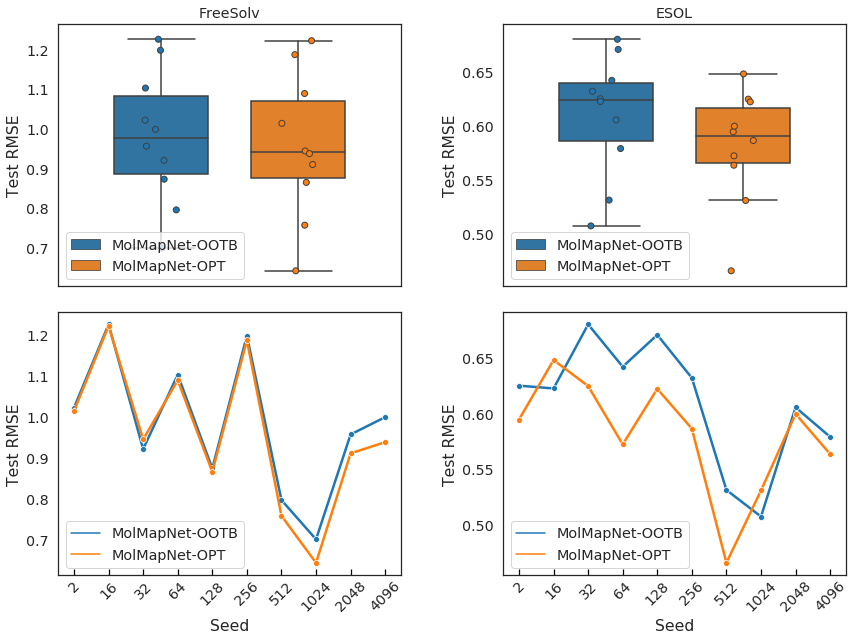

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (12, 9))
(axes1, axes2) = axes

(ax1, ax2, ) = axes1

tasks = ['FreeSolv', 'ESOL'] #, , 'BACE', 'Tox21'

for order, ax in zip([["FreeSolv"],["ESOL"],], axes1): #['Tox21'],

    sns.boxplot(x="task_name", y="test_performance",hue = 'model', data=dfl, palette= 'tab10', 
                order = order, fliersize=0, ax= ax, hue_order = hue_order)

    g = sns.stripplot(x="task_name", y="test_performance", hue = 'model', data=dfl, 
                      color= ".2", order = order, 
                      ax= ax, size = 6,hue_order=hue_order,
                       split=True,  jitter=True, linewidth=1, edgecolor='gray',  palette = 'tab10') #palette="Set2",palette = [".8", ".8"]


    handles, labels = g.get_legend_handles_labels()
    g.legend(handles[0:2], labels[0:2], fontsize='x-large', loc = "lower left")
    
for ax in axes1:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x',which='major',direction='in', bottom=True,length=6, color='white')
    

ax1.set_ylabel('Test RMSE')
ax2.set_ylabel('Test RMSE')
#ax3.set_ylabel('Test ROC-AUC')

# ax1.set_ylim(0.6, 0.9)
# ax2.set_ylim(0.85, 0.90)
# ax3.set_ylim(0.6, 0.83)


ax1, ax2,  = axes2

for task, ax in zip(tasks, axes2):

    df = dfl[dfl.task_name == task]
    df.seed = df.seed.astype(str)
  
    g = sns.lineplot(x="seed", y="test_performance", hue = 'model', style = True, hue_order=hue_order, palette = 'tab10',
                     marker='o',  #dashes=[(2,2)], marker='o', s
                     sort = False, data=df,  linewidth=linewidth, ax = ax)

    
    handles, labels = g.get_legend_handles_labels()
    g.legend(handles[1:-1], labels[1:-1], fontsize='x-large', loc = "lower left")
    g.set_xticklabels(df.seed.unique(), rotation=45 )
    g.tick_params(axis='x',which='major',direction='in', bottom=True,length=6, color='black')
    g.set_xlabel(task)


for ax in axes2:
    ax.set_ylabel('')
    ax.set_xlabel('Seed')
    
ax1.set_ylabel('Test RMSE')
ax2.set_ylabel('Test RMSE')
#ax3.set_ylabel('Test ROC-AUC')

# ax1.set_ylim(0.6, 0.9)
# ax2.set_ylim(0.8, 0.9)
# ax3.set_ylim(0.6, 0.8)

adjust_box_widths(fig, 0.7)
plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.1)

fig.savefig('../images/svg/opt_vs_oob_reg.svg', dpi=300, format='svg')

/home/sxh/anaconda3/envs/rdkit2020/lib/python3.6/site-packages/seaborn/categorical.py:2787: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/home/sxh/anaconda3/envs/rdkit2020/lib/python3.6/site-packages/seaborn/categorical.py:2787: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/home/sxh/anaconda3/envs/rdkit2020/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/sxh/anaconda3/envs/rdkit2020/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


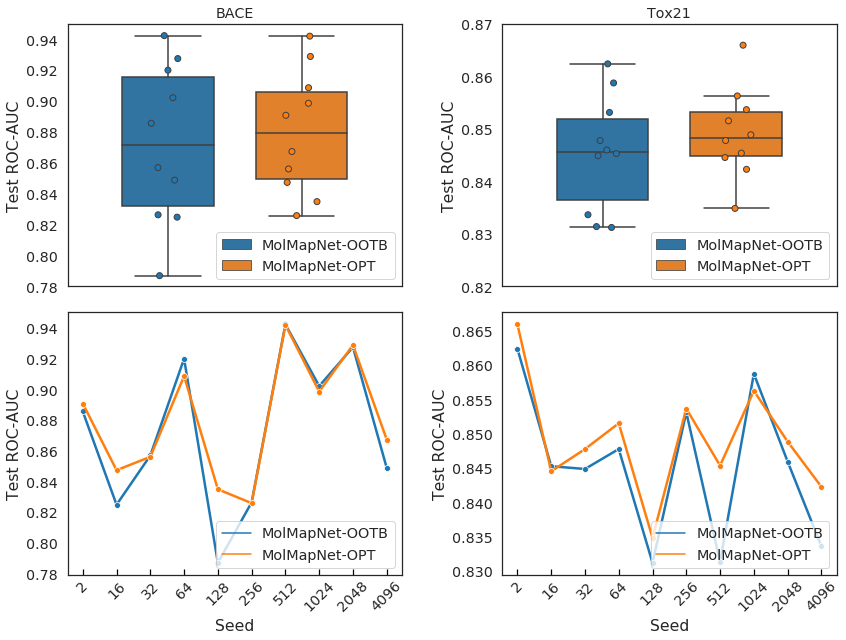

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (12, 9))
(axes1, axes2) = axes

(ax1, ax2, ) = axes1

tasks = ['BACE', 'Tox21'] #, , 'BACE', 'Tox21'

for order, ax in zip([["BACE"],["Tox21"],], axes1): #['Tox21'],

    sns.boxplot(x="task_name", y="test_performance",hue = 'model', data=dfl, palette= 'tab10', 
                order = order, fliersize=0, ax= ax, hue_order = hue_order)

    g = sns.stripplot(x="task_name", y="test_performance", hue = 'model', data=dfl, 
                      color= ".2", order = order, 
                      ax= ax, size = 6,hue_order=hue_order,
                       split=True,  jitter=True, linewidth=1, edgecolor='gray',  palette = 'tab10') #palette="Set2",palette = [".8", ".8"]


    handles, labels = g.get_legend_handles_labels()
    g.legend(handles[0:2], labels[0:2], fontsize='x-large', loc = "lower right")
    
for ax in axes1:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x',which='major',direction='in', bottom=True,length=6, color='white')
    

ax1.set_ylabel('Test ROC-AUC')
ax2.set_ylabel('Test ROC-AUC')
#ax3.set_ylabel('Test ROC-AUC')

ax1.set_ylim(0.78, 0.95)
ax2.set_ylim(0.82, 0.87)
# ax3.set_ylim(0.6, 0.83)


ax1, ax2  = axes2

for task, ax in zip(tasks, axes2):

    df = dfl[dfl.task_name == task]
    df.seed = df.seed.astype(str)
  
    g = sns.lineplot(x="seed", y="test_performance", hue = 'model', style = True, hue_order=hue_order, palette = 'tab10',
                     marker='o',  #dashes=[(2,2)], marker='o', s
                     sort = False, data=df,  linewidth=linewidth, ax = ax)

    
    handles, labels = g.get_legend_handles_labels()
    g.legend(handles[1:-1], labels[1:-1], fontsize='x-large', loc = "lower right")
    g.set_xticklabels(df.seed.unique(), rotation=45 )
    g.tick_params(axis='x',which='major',direction='in', bottom=True,length=6, color='black')
    g.set_xlabel(task)


for ax in axes2:
    ax.set_ylabel('')
    ax.set_xlabel('Seed')
    
ax1.set_ylabel('Test ROC-AUC')
ax2.set_ylabel('Test ROC-AUC')
#ax3.set_ylabel('Test ROC-AUC')

# ax1.set_ylim(0.6, 0.9)
# ax2.set_ylim(0.8, 0.9)
# ax3.set_ylim(0.6, 0.8)

adjust_box_widths(fig, 0.7)
plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.1)

fig.savefig('../images/svg/opt_vs_oob_cal.svg', dpi=300, format='svg')

In [9]:
x1 = dfl.groupby(['task_name', 'model'])['test_performance'].apply(np.mean).round(3).to_frame(name = 'mean')
x2 = dfl.groupby(['task_name', 'model'])['test_performance'].apply(np.std).round(3).to_frame(name = 'std')

In [10]:
x1

mean
task_name model                
BACE      MolMapNet-OOTB  0.872
          MolMapNet-OPT   0.880
ESOL      MolMapNet-OOTB  0.609
          MolMapNet-OPT   0.581
FreeSolv  MolMapNet-OOTB  0.979
          MolMapNet-OPT   0.957
Tox21     MolMapNet-OOTB  0.845
          MolMapNet-OPT   0.849

In [15]:
x2

std
task_name model                
BACE      MolMapNet-OOTB  0.049
          MolMapNet-OPT   0.038
ESOL      MolMapNet-OOTB  0.053
          MolMapNet-OPT   0.050
FreeSolv  MolMapNet-OOTB  0.159
          MolMapNet-OPT   0.171
Tox21     MolMapNet-OOTB  0.010
          MolMapNet-OPT   0.008

In [11]:
dfl.to_csv('./oob_opt.csv')

In [12]:
dfm = x1.join(x2)
dfm.to_csv('./oob_opt_mean.csv')

/home/sxh/anaconda3/envs/rdkit2020/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0.4, 1.1)

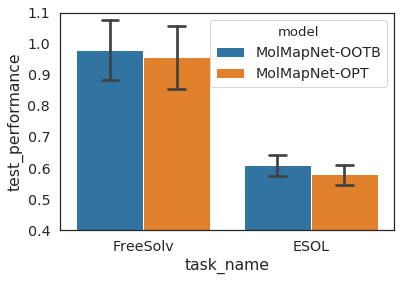

In [13]:
ax = sns.barplot(x = 'task_name', y = 'test_performance',hue = 'model', palette='tab10', capsize=0.1, 
            data = dfl[dfl.test_metric == 'RMSE'], 
            hue_order=['MolMapNet-OOTB', 'MolMapNet-OPT'])

ax.set_ylim(0.4,  1.1)

(0.8, 0.91)

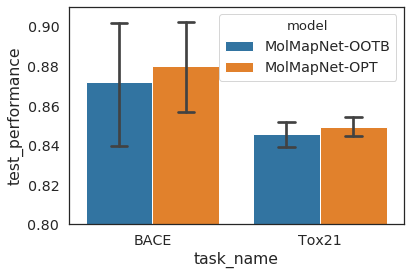

In [14]:
ax = sns.barplot(x = 'task_name', y = 'test_performance',hue = 'model', palette='tab10', capsize=0.1, 
            data = dfl[dfl.test_metric == 'ROC_AUC'], 
            hue_order=['MolMapNet-OOTB', 'MolMapNet-OPT'])

ax.set_ylim(0.8,  0.91)